## Phase 1 : **EDA et pretraitment des datasets**

Dans cette section, nous allons nous concentrer sur l'EDA (Exploratory Data Analysis) pour les datasets que nous avons à notre disposition. 

### **Analyse exploratoire et prétraitement des données**

Dans ce projet, nous exploitons plusieurs sources de données relatives aux employés de l'entreprise HumanForYou afin de prédire le phénomène d’attrition. Les données principales sont issues d'un total de 5 jeu de données contenant des informations professionnelles et organisationnelles sur les employés, complété par des enquêtes de satisfaction des employés, des évaluations managériales, ainsi que des données temporelles détaillant les heures d’entrée et de sortie quotidiennes. La phase d’analyse exploratoire des données (EDA) et de prétraitement constitue une étape fondamentale du projet, car elle permet de comprendre la structure des données, d’identifier d’éventuelles incohérences, valeurs manquantes ou variables non pertinentes, et de préparer un jeu de données propre et cohérent pour le machine learning et l'entrainement des modèles. Cette phase comprend notamment la suppression de variables sensibles ou non informatives afin de limiter les biais et les fuites d’information, le traitement et l’imputation des valeurs manquantes, la détection et la gestion des valeurs aberrantes, ainsi que la transformation et l’agrégation des données temporelles en variables synthétiques représentatives du comportement de travail des employés. Enfin, les variables catégorielles sont encodées de manière appropriée, le tout garantissant une préparation des données robuste, reproductible et compatible avec les modèles de machine learning utilisés par la suite.

### **Ouverture des datasets**

Nous allons commencer par ouvrir les 3 premiers datasets : *general_data.csv, employee_survey_data.csv et manager_survey_data.csv.*

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

general_data = pd.read_csv('general_data.csv')
employee_survey_data = pd.read_csv('employee_survey_data.csv')
manager_survey_data = pd.read_csv('manager_survey_data.csv')

Le dataset *general_data* regroupe les informations RH générales sur les employés, telles que les caractéristiques professionnelles, le parcours dans l’entreprise et la variable cible *Attrition*. Les deux autres jeux de données contiennent des informations issues d’enquêtes complémentaires : *employee_survey_data* fournit les scores de satisfaction et de bien-être rapportés par les employés, tandis que *manager_survey_data* présente les évaluations de performance et d’engagement attribuées par les managers. Le chargement de ces datasets constitue une étape essentielle afin de vérifier leur structure, leurs dimensions et la cohérence des variables, et de préparer les analyses exploratoires et les opérations de nettoyage à venir. Pour ce faire, nous utilisons la bibliothèque *pandas* pour la manipulation des données, *missingno* pour l’analyse visuelle des valeurs manquantes, et *matplotlib* pour la visualisation, ce qui nous permettra d’avoir une première compréhension globale de la qualité et de la complétude des données.

### **Analyse de la taille des datasets**

Nous commençons par afficher le nombre de ligne et de colonnes de chaque dataset pour avoir une idée de leur taille.

In [3]:
print(f"Nombre de ligne/colonne de general_data.csv : {general_data.shape}\n")
print(f"Nombre de ligne/colonne de employee_survey_data.csv : {employee_survey_data.shape}\n")
print(f"Nombre de ligne/colonne de manager_survey_data.csv : {manager_survey_data.shape}\n")


Nombre de ligne/colonne de general_data.csv : (4410, 24)

Nombre de ligne/colonne de employee_survey_data.csv : (4410, 4)

Nombre de ligne/colonne de manager_survey_data.csv : (4410, 3)



Avant de joindre nos datasets, nous devons vérifier l'unicité de la variable *EmployeeID* dans les datasets. La vérification de l’unicité de *EmployeeID* est une étape cruciale avant toute opération de jointure entre les différents datasets. En effet, *EmployeeID* sert de clé d’identification commune permettant de relier de manière fiable les informations RH, les réponses aux enquêtes des employés et les évaluations des managers. S’assurer que cette variable est unique dans chaque table garantit qu’une jointure avec *pandas* ne génèrera ni duplications de lignes ni pertes d’informations, et que chaque employé sera correctement représenté par une seule observation dans le jeu de données final. Cette vérification contribue ainsi à préserver l’intégrité des données et la cohérence des analyses ultérieures.

In [4]:
#Verification de l'unicité de EmployeeID
print("Clé primaire de general_data = EmployeeID ? :", general_data["EmployeeID"].is_unique, "\n")
print("Clé primaire de employee_survey_data = EmployeeID ? :", employee_survey_data["EmployeeID"].is_unique, "\n")
print("Clé primaire de manager_survey_data = EmployeeID ? :", manager_survey_data["EmployeeID"].is_unique, "\n")

Clé primaire de general_data = EmployeeID ? : True 

Clé primaire de employee_survey_data = EmployeeID ? : True 

Clé primaire de manager_survey_data = EmployeeID ? : True 



Nous remarquons après exécution du bloc de code précédent que *EmployeeID* est bien unique dans chaque dataset. Nous pouvons donc la qualifier de clé primaire et ainsi l'utiliser pour joindre nos tables.

### **Jointure des 3 premiers datasets**

Nous fusionnons les différentes sources de données autour d’une clé commune, *EmployeeID*, afin de constituer un dataset unique et enrichi. La jointure de type *left join* garantit que tous les employés présents dans le dataset principal (*general_data*) sont conservés, même si certaines informations issues des enquêtes employés ou managers sont manquantes. Cette approche permet de centraliser l’ensemble des variables pertinentes tout en évitant la perte d’observations, ce qui est essentiel pour conserver une vision complète de la population étudiée.

In [5]:
#Jointure des datasets
df = general_data.merge(employee_survey_data, on="EmployeeID", how="left")
df = df.merge(manager_survey_data, on="EmployeeID", how="left")

Nous vérifions ensuite que *EmployeeID* est toujours la clé primaire du nouveau dataset.

In [6]:
#Verification que EmployeeID est toujours unique
print("Clé primaire du dataset final = EmployeeID ? : ", df["EmployeeID"].is_unique)

Clé primaire du dataset final = EmployeeID ? :  True


Nous constatons que c'est bien le cas, nous pouvons poursuivre avec les autres vérifications.

Nous vérifions ensuite que le nombre de lignes est inchangé après la fusion, signe qu'aucune données n'a été altérée/perdue.

In [7]:
#Verification que le nombre de ligne est toujours le même
print("Nombre de lignes du dataset de base: ", len(general_data),"\n")
print("Nombre de lignes du dataset final (avec jointures): ", len(df),"\n")

Nombre de lignes du dataset de base:  4410 

Nombre de lignes du dataset final (avec jointures):  4410 



Comme le nombre de lignes est toujours le même (4410), passon à l'étape suivante.

La fonction *.info()* de *pandas* nous permet d'afficher le nombre de valeurs manquantes par variable et d’évaluer la complétude du dataset après la jointure. Cette étape est indispensable pour identifier les colonnes nécessitant un traitement particulier, comme l’imputation ou la suppression, et pour détecter d’éventuels problèmes liés à la fusion des datasets. Elle constitue ainsi un diagnostic rapide de la qualité des données avant d’entamer les phases de nettoyage et de prétraitement.
Nous constatons déjà 5 variables avec des données manquantes : *NumCompaniesWorked*, *TotalWorkingYears*, *EnvironmentSatisfaction*, *JobSatisfaction* et *WorkLifeBalance*. Nous verrons plus bas quelles méthodes d'imputation appliquer.

In [8]:
#Affichage des informations générales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

La fonction *.describe()* nous permet d'afficher les informations statistique de base de notre dataset comme la médiane, la moyenne, l'écart-type, les valeurs minimales et maximales et les quartiles. Cela nous donne une meilleure idée des données avec lesquelles nous travaillons.

In [9]:
#Affichage des statistiques du dataset final
print(df.describe())

               Age  DistanceFromHome    Education  EmployeeCount   EmployeeID  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0  2205.500000   
std       9.133301          8.105026     1.023933            0.0  1273.201673   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.250000   
50%      36.000000          7.000000     3.000000            1.0  2205.500000   
75%      43.000000         14.000000     4.000000            1.0  3307.750000   
max      60.000000         29.000000     5.000000            1.0  4410.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4391.000000        4410.000000   
mean      2.063946   65029.312925            2.694830          15.209524   
std       1.106689   47068.888559         

La ligne de code ci-dessous nous permet d'afficher le nombre de valeurs manquantes par variable dans notre dataset. Nous confirmons donc le résultat de l'output de *.info()* : *NumCompaniesWorked*, *TotalWorkingYears*, *EnvironmentSatisfaction*, *JobSatisfaction* et *WorkLifeBalance* ont des valeurs manquantes.

In [10]:
#Affichage des informations du dataset
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64


Le bloc de code ci-dessous formalise l’identification des variables à exclure du processus de modélisation. Les variables sensibles (Age, Gender, MaritalStatus) sont retirées afin de limiter les biais discriminatoires et de respecter des considérations éthiques, tandis que les variables non informatives (EmployeeCount, StandardHours, Over18), constantes ou peu pertinentes, sont supprimées car elles n’apportent aucune information utile à la prédiction de l’attrition. La combinaison de ces listes permet une suppression structurée, traçable et cohérente des variables non souhaitées.

In [11]:
#Définition des variables sensibles
SENSITIVE_VARS = ["Age", "Gender", "MaritalStatus"]
#Définition des variables non-utiles
NON_INFORMATIVE_VARS = ["EmployeeCount", "StandardHours", "Over18"]

#Combinaison des 2 listes
COLS_TO_DROP = SENSITIVE_VARS + NON_INFORMATIVE_VARS


Nous vérifions que la liste *COLS_To_DROP* contient les bonnes colonnes à supprimer afin de ne pas corrompre le dataset. L'outpus est correct, nous pouvons donc procéder à la suppression des colonnes.

In [12]:
#Vérification que les variables à supprimer son les bonnes
[col for col in COLS_TO_DROP if col in general_data.columns]

['Age', 'Gender', 'MaritalStatus', 'EmployeeCount', 'StandardHours', 'Over18']

In [13]:
#Suppresion des variables
general_data_clean = general_data.drop(
    columns=COLS_TO_DROP,
    errors="ignore"
)

Nous vérifions ensuite que les variables ont bien été supprimer du dataset en faisant une union d'ensemble entre *COLS_TO_DROP* et les colonnes du dataset. On remarque que l'output est un ensemble vide. Les colonnes ont bien été supprimées.

In [14]:
#Vérification que les variables ont bien été supprimer
set(COLS_TO_DROP) & set(general_data_clean.columns)

set()

Nous affichons les informations du dataset à nouveau avant de procéder. Notre nouveau dataset comprend à présent 18 colonnes. Cependant, nous avons toujours le problème des valeurs manquantes. Avant de passer à l'imputation, définissons la colonne/variable cible (y) et les features pour l'entrainement (X).

In [15]:
#Affichage des informations du nouveau dataset.
general_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4410 non-null   object 
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeID               4410 non-null   int64  
 7   JobLevel                 4410 non-null   int64  
 8   JobRole                  4410 non-null   object 
 9   MonthlyIncome            4410 non-null   int64  
 10  NumCompaniesWorked       4391 non-null   float64
 11  PercentSalaryHike        4410 non-null   int64  
 12  StockOptionLevel         4410 non-null   int64  
 13  TotalWorkingYears        4401 non-null   float64
 14  TrainingTimesLastYear   

In [16]:
TARGET = "Attrition"

y = general_data_clean[TARGET]
X = general_data_clean.drop(columns=[TARGET])


Affichons les datatypes de nos variables :

In [17]:
X.dtypes

BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeID                   int64
JobLevel                     int64
JobRole                     object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

Nous avons fini la première partie du prétraitement. Passons au traitement des dataset *in_time.csv* et *out_time.csv*.

### Pretraitement des datasets in_time et out_time

In [18]:
#Import des datasets pour les temps d'entrée et de sortie
in_df  = pd.read_csv("in_out_time/in_time.csv")
out_df = pd.read_csv("in_out_time/out_time.csv")

#Conversion de la table in_time du format wide au format long en gros, les données passent en lignes plutot que d'etre en colonne.
in_long = in_df.melt(
    id_vars="EmployeeID",
    var_name="Date",
    value_name="InTime"
)

#print(in_long.info())

#Conversion de la table out_time du format wide au format long.
out_long = out_df.melt(
    id_vars="EmployeeID",
    var_name="Date",
    value_name="OutTime"
)

#print(out_long.info())


#Fusion des 2 tables générées aux niveau du EmployeeID et de la Date.
time_df = in_long.merge(
    out_long,
    on=["EmployeeID", "Date"],
    how="inner"
)

#print(time_df.info())

#Conversion des heures d'entrée et de sortie au format datetime
time_df["InTime"]  = pd.to_datetime(time_df["InTime"],  errors="coerce")
time_df["OutTime"] = pd.to_datetime(time_df["OutTime"], errors="coerce")

#Calcul du nombre d'heure travaille par jour en heure.
time_df["DailyHours"] = (
    time_df["OutTime"] - time_df["InTime"]
).dt.total_seconds() / 3600

#Conservation des valeurs uniquement comprise entre 0 et 16 heures
time_df = time_df[
    (time_df["DailyHours"] > 0) &
    (time_df["DailyHours"] <= 16)
]

#Aggregation des données dans un nouveau dataset avec la moyenne des heure de travaille par jour, l'ecart-type et le nombre de jours travaillé
agg_df = (
    time_df
    .groupby("EmployeeID")
    .agg(
        MeanDailyHours=("DailyHours", "mean"),
        StdDailyHours=("DailyHours", "std"),
        WorkedDays=("DailyHours", "count")
    )
    .reset_index()
)

#print(agg_df.describe())
print(agg_df.info())

#Sauvegarde du dataset dans un nouveau fichier csv
agg_df.to_csv("work_time_aggregated.csv", index=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeID      4410 non-null   int64  
 1   MeanDailyHours  4410 non-null   float64
 2   StdDailyHours   4410 non-null   float64
 3   WorkedDays      4410 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 137.9 KB
None


### **Explication du code pour le traitement des données horraires.**

Ce code a pour objectif de **transformer des données horaires brutes, volumineuses et difficilement exploitables en un jeu de données agrégé, compact et pertinent pour la modélisation**. Chaque bloc joue un rôle précis dans ce processus.

Tout d’abord, les fichiers *in_time.csv* et *out_time.csv* sont importés séparément. Ils contiennent, pour chaque employé, les heures d’entrée et de sortie quotidiennes sous un format dit *wide*, où chaque colonne correspond à un jour de travail. Ce format n’est pas adapté aux calculs temporels ni à l’agrégation.

Les tables sont ensuite converties du format *wide* au format *long* à l’aide de la fonction `melt`. Cette opération transforme les colonnes représentant les jours en lignes, ce qui permet d’obtenir une structure standardisée avec une ligne par employé et par date. Le format long est essentiel pour effectuer des opérations temporelles, des jointures et des calculs statistiques cohérents.

Les deux tables ainsi transformées sont fusionnées sur les variables *EmployeeID* et *Date* afin d’associer, pour chaque employé et chaque jour, l’heure d’entrée et l’heure de sortie correspondantes. Cette fusion garantit que seules les journées pour lesquelles les deux informations sont disponibles sont conservées.

Les colonnes *InTime* et *OutTime* sont ensuite converties au format `datetime`, ce qui permet d’effectuer des calculs temporels fiables. À partir de ces valeurs, le nombre d’heures travaillées par jour est calculé en faisant la différence entre l’heure de sortie et l’heure d’entrée, puis en convertissant le résultat en heures.

Un filtrage est ensuite appliqué afin d’éliminer les valeurs aberrantes ou incohérentes, telles que des durées négatives ou des journées de travail excessivement longues. Seules les journées dont la durée est comprise entre 0 et 16 heures sont conservées, ce qui correspond à des règles métier réalistes et limite l’impact des erreurs de saisie ou de badgeage.

Les données nettoyées sont ensuite agrégées au niveau de l’employé. Pour chaque *EmployeeID*, trois variables synthétiques sont calculées : la moyenne du temps de travail journalier sur l’année (*MeanDailyHours*), l’écart-type de ce temps de travail (*StdDailyHours*), qui mesure la régularité des horaires, et le nombre total de jours travaillés (*WorkedDays*). Cette agrégation permet de résumer l’ensemble des informations temporelles en une seule ligne par employé, réduisant ainsi drastiquement la taille du dataset.

Enfin, le dataset agrégé est inspecté pour vérifier sa structure, puis sauvegardé dans un nouveau fichier *work_time_aggregated.csv*. Ce fichier compact et informatif peut ensuite être facilement joint au dataset principal et utilisé comme ensemble de variables explicatives dans les modèles de machine learning.


### **Fusion du dataset initial et du dataset des données horraires.**

Suivant le même principe que celui de la fusion des 3 datasets initiaux effectuer plus haut, nous allons effectuer un left join entre la table *general_data_clean* et celle générée par le code précédent, présente dans le fichier *in_out_time_dataset.csv*. Notre dataset final est désormais prêt pour plus de traitement (imputation, encodages etc).

In [19]:
#fusion du dataset initial avec le dataset des horraires
in_out_time_dataset = pd.read_csv("work_time_aggregated.csv")
final_dataset = general_data_clean.merge(in_out_time_dataset, on="EmployeeID", how="left")
#final_dataset.to_csv("projet.csv", index=False)

print(f" Nombre de ligne/colonne du dataset final : {final_dataset.shape}\n")
final_dataset.head()

 Nombre de ligne/colonne du dataset final : (4410, 21)



,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,MonthlyIncome,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MeanDailyHours,StdDailyHours,WorkedDays
0,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Healthcare Representative,131160,...,11,0,1.0,6,1,0,0,7.373651,0.283224,232
1,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,1,Research Scientist,41890,...,23,1,6.0,3,5,1,4,7.718969,0.313351,236
2,No,Travel_Frequently,Research & Development,17,4,Other,3,4,Sales Executive,193280,...,15,3,5.0,2,5,0,3,7.013240,0.311551,242
3,No,Non-Travel,Research & Development,2,5,Life Sciences,4,3,Human Resources,83210,...,11,3,13.0,5,8,7,5,7.193678,0.284133,235
4,No,Travel_Rarely,Research & Development,10,1,Medical,5,1,Sales Executive,23420,...,12,2,9.0,2,6,0,4,8.006175,0.300656,245


### **Vérification des données manquantes dans notre nouveaux dataset**

Nous remarquons qu'il y a deux  variables à valeurs manquantes dans notre dataset finale : *NumCompaniesWorked et TotalWorkingYears*. Le nettoyage et la reconstruction du dataset final ont implicitement éliminé certaines lignes ou colonnes problématiques, ce qui pourrait expliquer le fait qu'il n y ai plus que deux variables problématique.
Nous les classons par ordre décroissant en fonction de la proportion de valeur manquante. Par exemple pour *NumCompaniesWorked*, il y a 0.43% de valeurs manquantes environ (19/4410) et pour *TotalWorkingYears* il y a environ 0.20% de valeurs manquantes (9/4410).

In [20]:
#Selection des colonnes à valeurs manquantes dans l'ordre décroissant en fonction de la proportion de valeur manquantes
missing = final_dataset.isna().mean().sort_values(ascending=False)
#Affichage des colonnes avec un pourcentage de valeurs manquantes supérieur à 0 ie, il ya des valeurs manquantes
missing[missing > 0]


NumCompaniesWorked    0.004308
TotalWorkingYears     0.002041
dtype: float64

Nous visualisons cela avec la bibliothèque *missingno* :

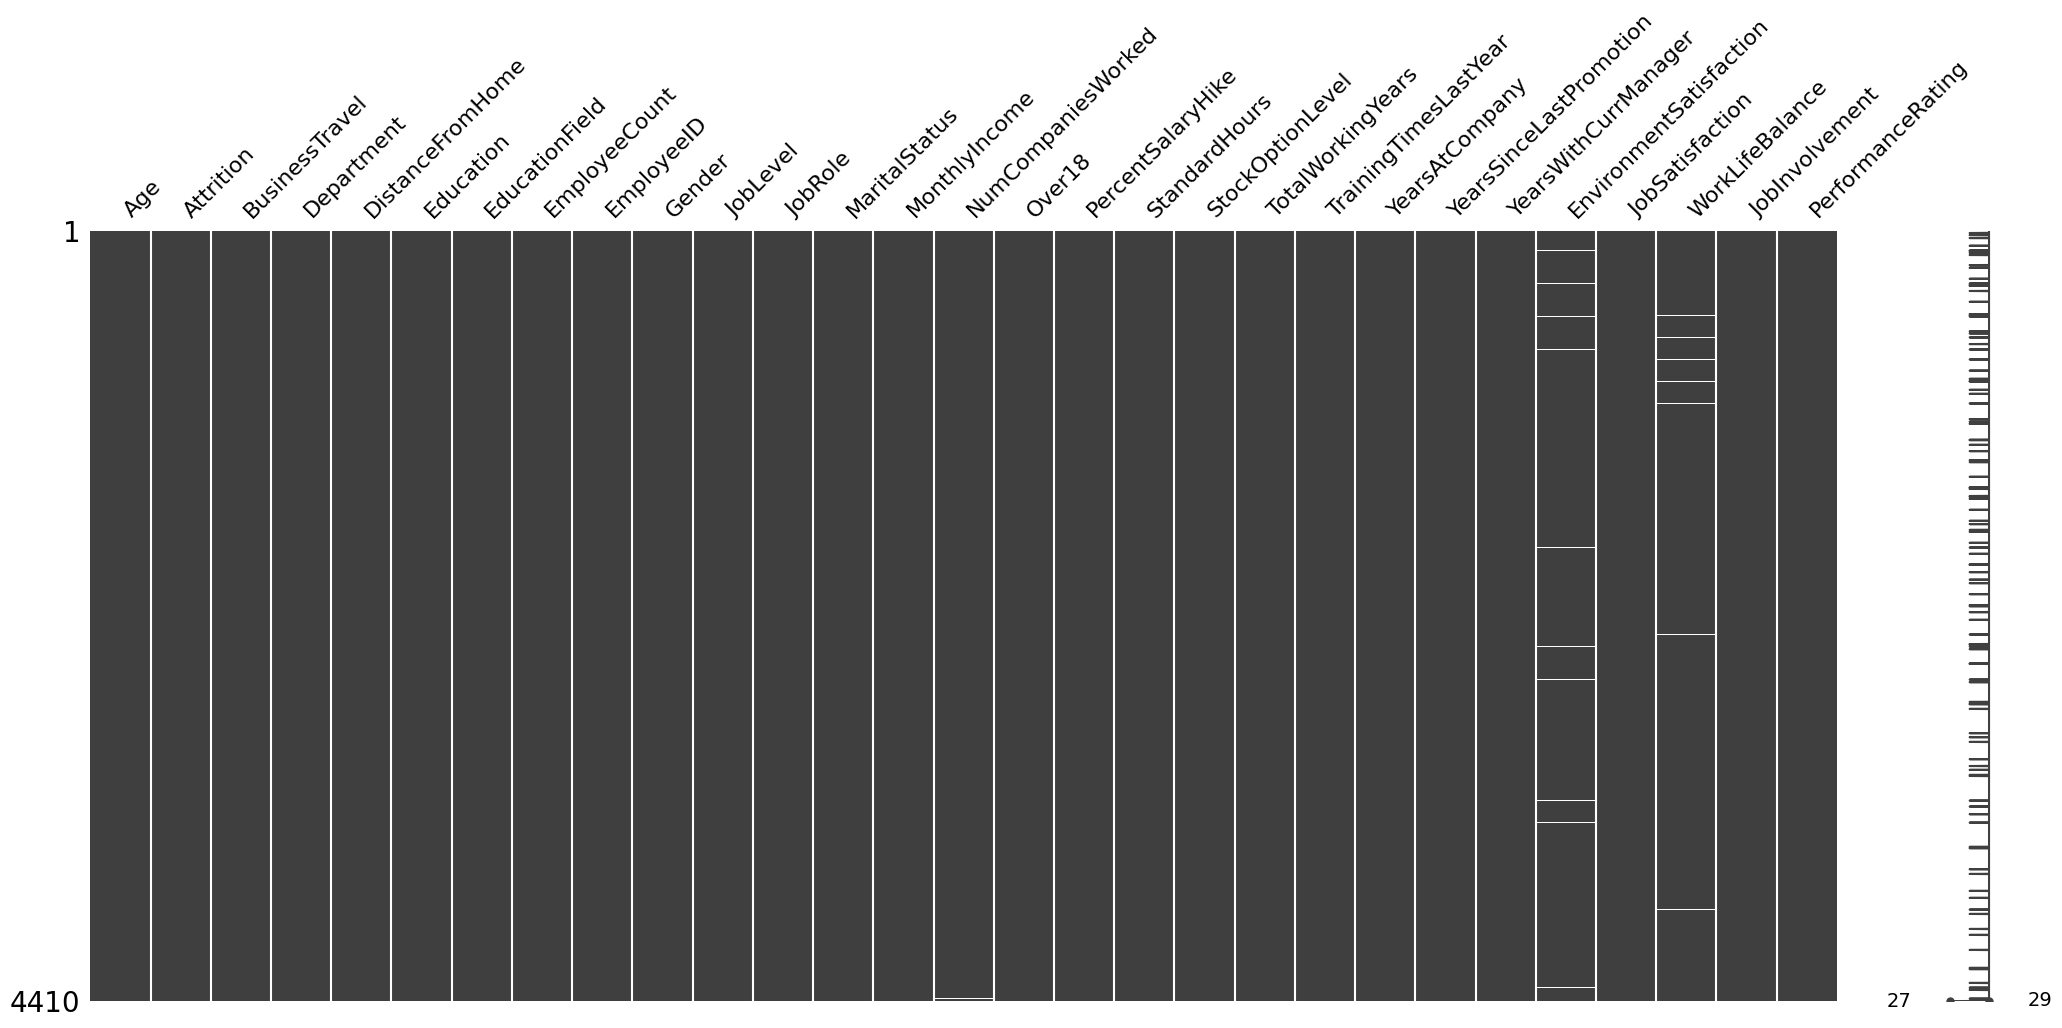

In [21]:
#Visualitation des données manquantes
msno.matrix(df)
plt.show()

### Imputation des données manquantes

L’imputation des valeurs manquantes constitue une étape essentielle du prétraitement des données, car la majorité des algorithmes de machine learning ne sont pas capables de gérer directement des observations incomplètes. Ignorer ou supprimer systématiquement les lignes contenant des valeurs manquantes entraînerait une perte d’information potentiellement importante et pourrait introduire un biais, notamment si les valeurs manquantes ne sont pas distribuées de manière aléatoire. L’objectif de l’imputation est donc de remplacer ces valeurs manquantes par des estimations plausibles, tout en préservant au mieux la structure statistique des données et en limitant l’impact sur les relations entre variables. Une stratégie d’imputation adaptée permet ainsi de conserver l’ensemble des observations, d’améliorer la stabilité des modèles et de garantir la cohérence du jeu de données final.

Nous commençons par sélectionner les colonnes numérique et catégorielles :

In [22]:
#Selection des colonnes numérique et catégorielles
num_cols = final_dataset.select_dtypes(include="number").columns
cat_cols = final_dataset.select_dtypes(include=["object","category"]).columns

Nous effectuons ensuite l'imputation. Pour les variables numériques, l’imputation est réalisée à l’aide de la médiane grâce à la classe *SimpleImputer* de *scikit-learn*. La médiane est choisie car elle est robuste aux valeurs aberrantes et aux distributions asymétriques, ce qui est particulièrement pertinent pour des variables RH telles que NumCompaniesWorked ou TotalWorkingYears, caractérisées par des distributions non gaussiennes et des valeurs extrêmes (voir plus bas dans la section *d'analyse univariée*). Contrairement à la moyenne, la médiane permet de limiter l’influence de ces outliers et de préserver une représentation réaliste de la tendance centrale des données.

Pour les variables catégorielles, l’imputation repose sur la valeur la plus fréquente, c’est-à-dire le mode. Cette approche consiste à remplacer les valeurs manquantes par la modalité la plus représentée dans la population, ce qui correspond à l’hypothèse la plus probable en l’absence d’information supplémentaire. L’imputation par le mode est simple, interprétable et cohérente avec les modèles de classification, car elle n’introduit pas de nouvelles catégories artificielles et respecte la structure initiale des variables qualitatives.

Enfin, l’utilisation de *SimpleImputer* permet d’automatiser ce processus de manière reproductible et cohérente sur l’ensemble du dataset. Les imputations sont calculées à partir des statistiques observées dans les données, garantissant une transformation homogène et compatible avec une potentielle intégration ultérieure dans un pipeline de machine learning. Cette approche assure ainsi un équilibre entre simplicité, robustesse et efficacité pour la préparation des données avant la phase de modélisation et d'entrainement.

In [23]:
#Imputation numérique -> médiane
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
final_dataset[num_cols] = num_imputer.fit_transform(final_dataset[num_cols])

#Imputation catégorielle -> mode
cat_imputer = SimpleImputer(strategy="most_frequent")
final_dataset[cat_cols] = cat_imputer.fit_transform(final_dataset[cat_cols])


In [24]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4410 non-null   object 
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   float64
 4   Education                4410 non-null   float64
 5   EducationField           4410 non-null   object 
 6   EmployeeID               4410 non-null   float64
 7   JobLevel                 4410 non-null   float64
 8   JobRole                  4410 non-null   object 
 9   MonthlyIncome            4410 non-null   float64
 10  NumCompaniesWorked       4410 non-null   float64
 11  PercentSalaryHike        4410 non-null   float64
 12  StockOptionLevel         4410 non-null   float64
 13  TotalWorkingYears        4410 non-null   float64
 14  TrainingTimesLastYear   

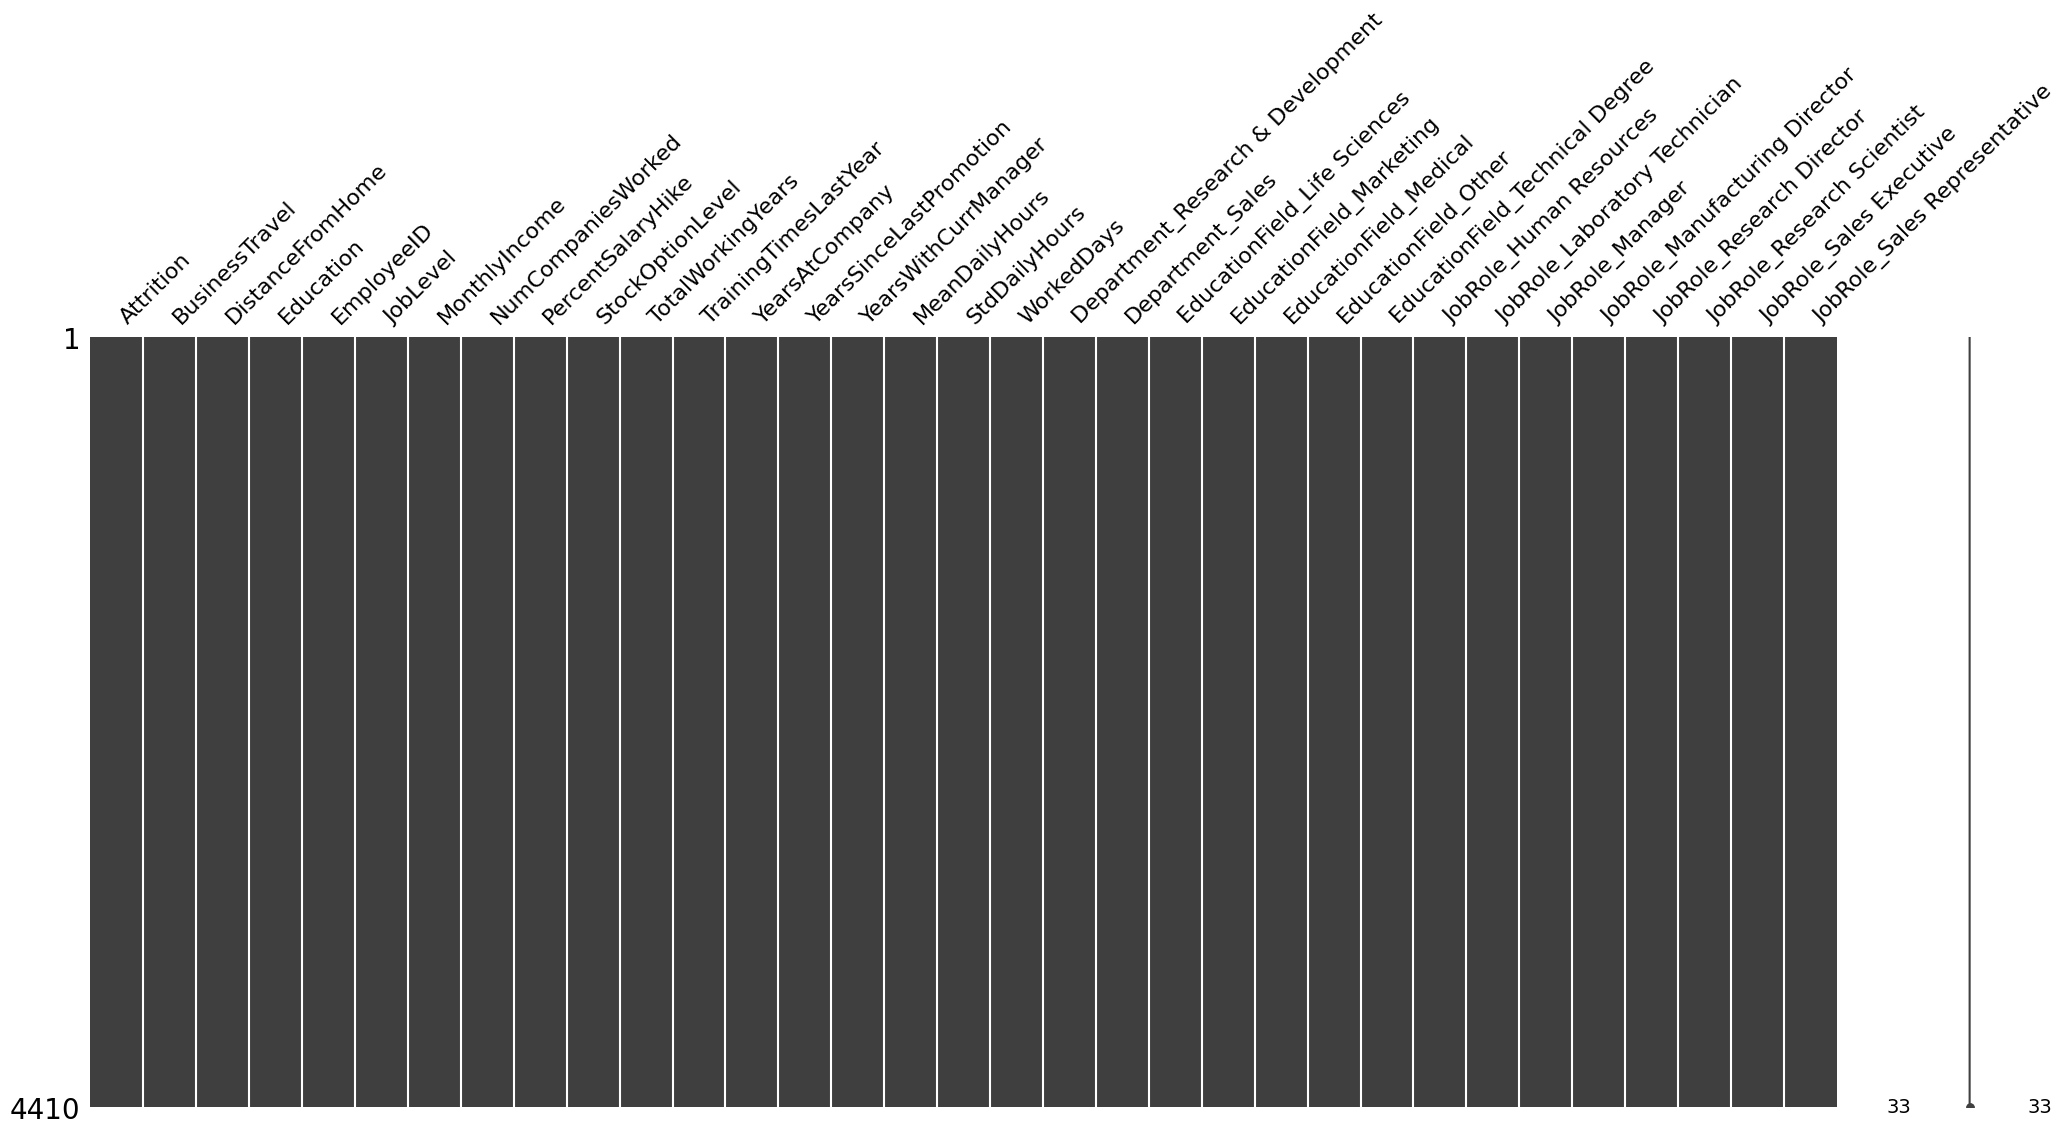

In [31]:
msno.matrix(final_dataset)
plt.show()

On remarque d'après la fonction *.info()* et la modélisation avec *missingno* que les valeurs manquantes ont bien été imputées. Nous pouvons désormais passé à l'analyse univarié de notre dataset.

### Analyse univariée

Afin d'effectuer l'analyse univariée, nous allons importer la bibliothèque *Seaborn*. Nous commencerons avec les variables numériques.

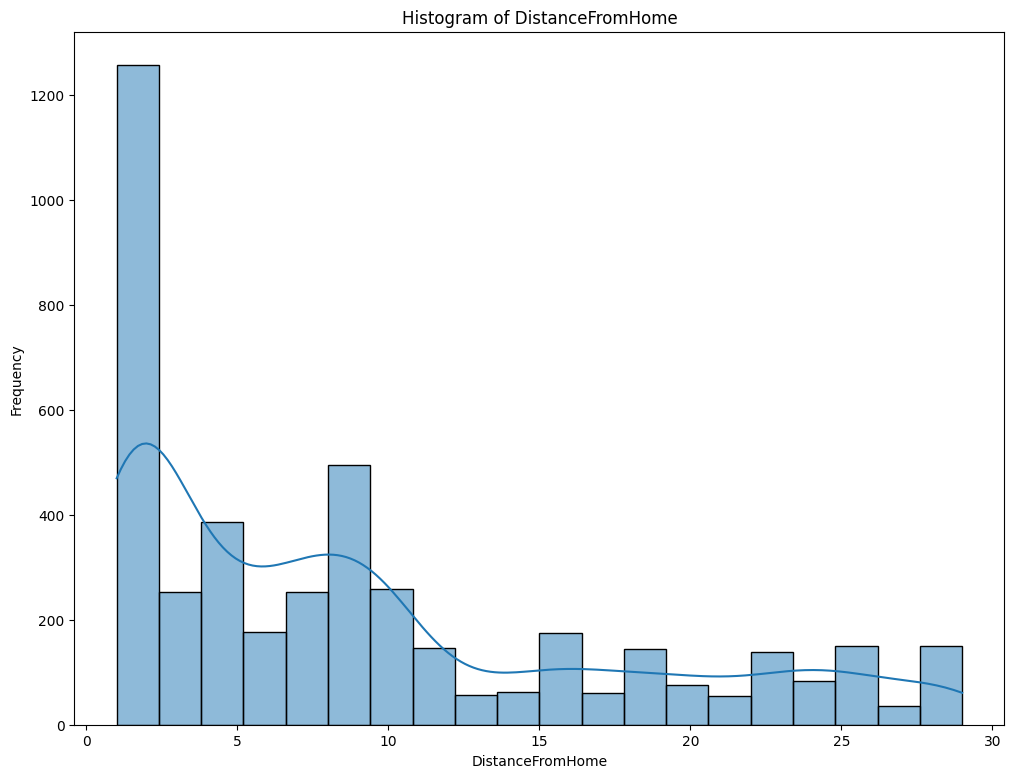

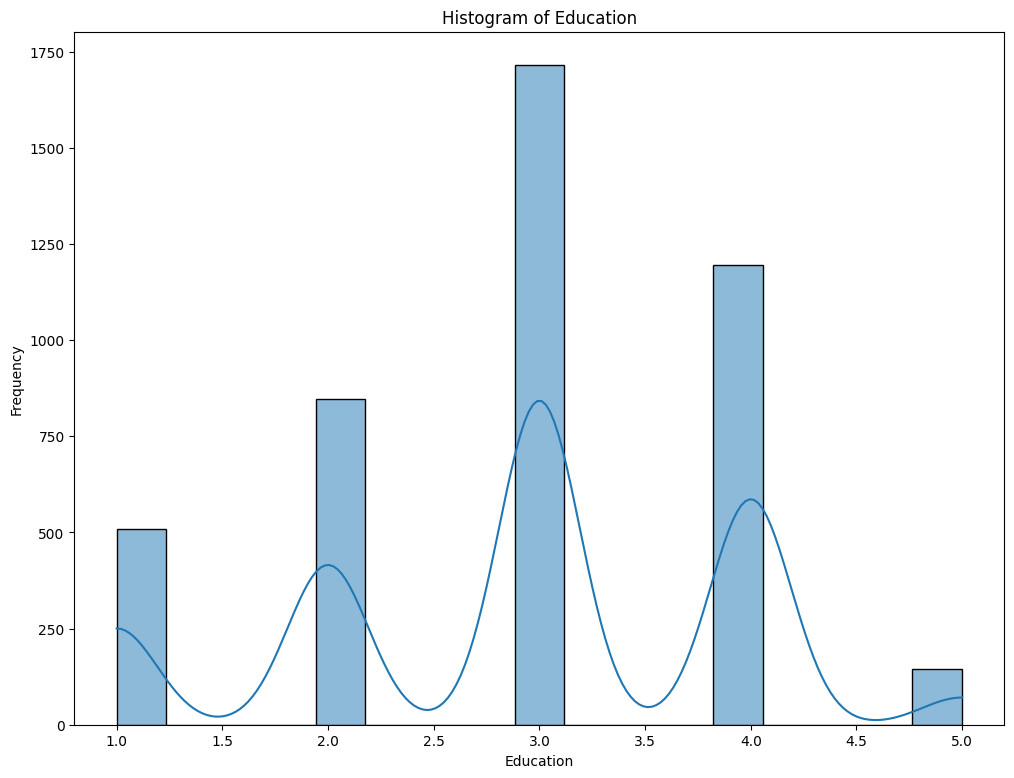

<Figure size 1200x900 with 0 Axes>

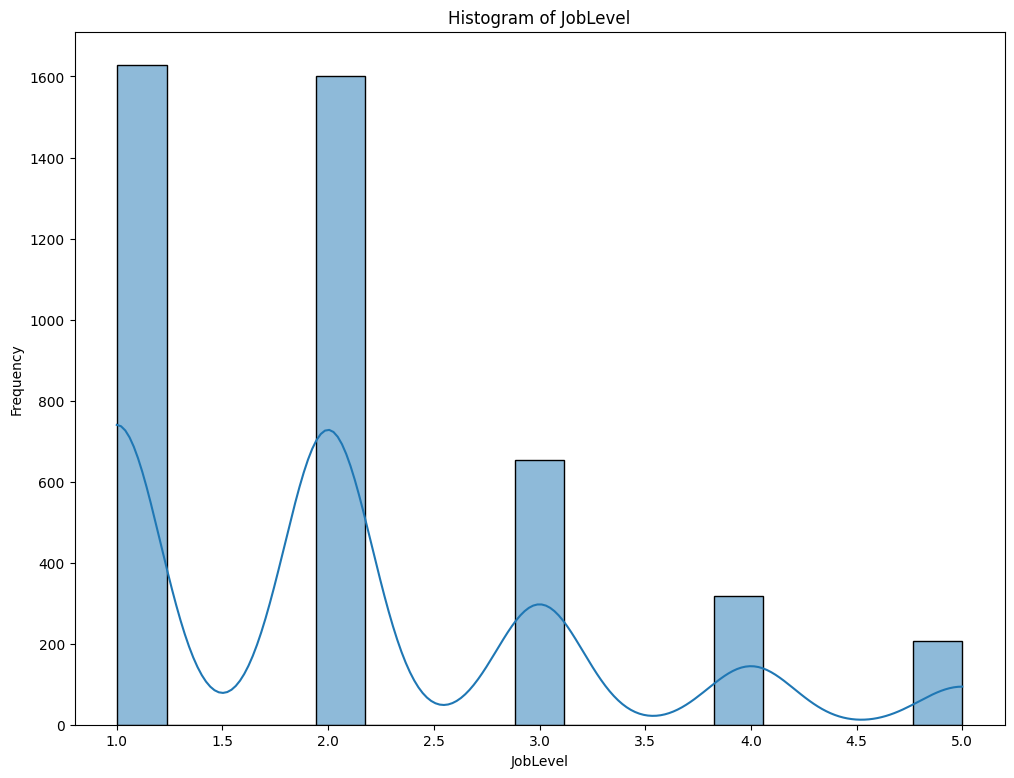

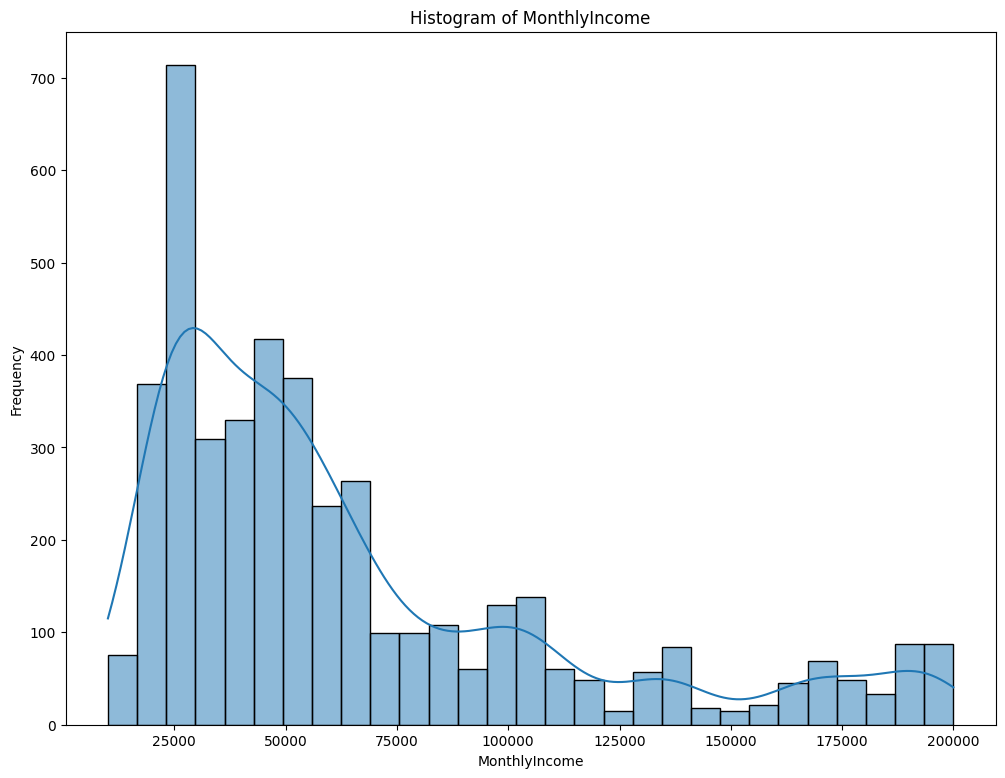

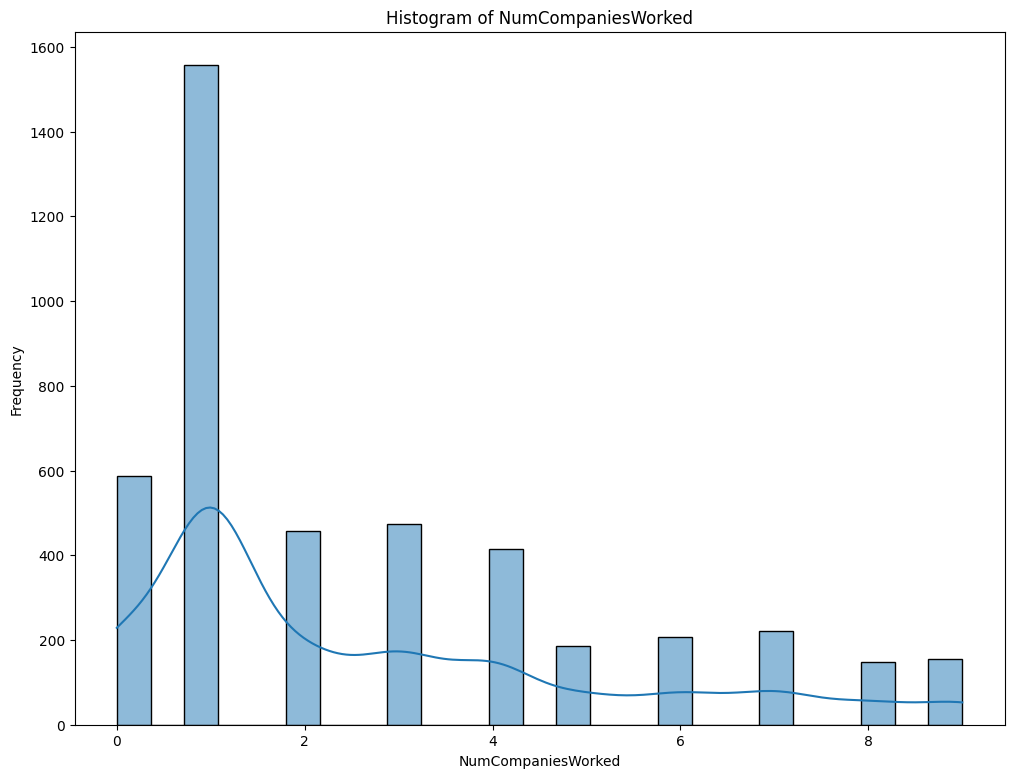

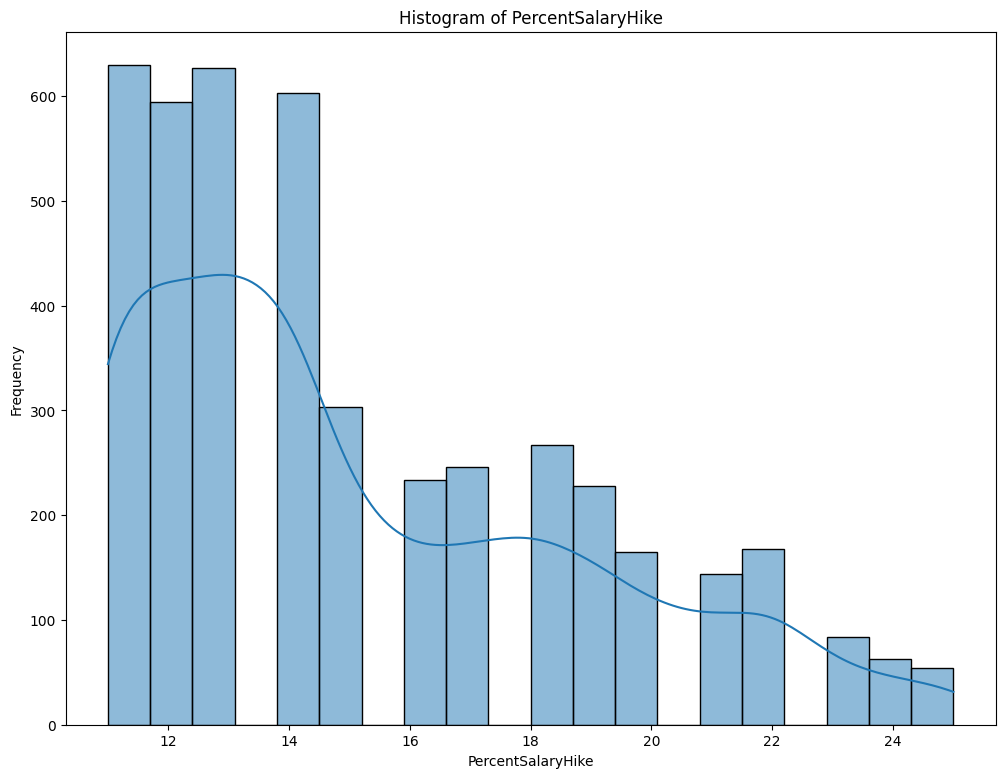

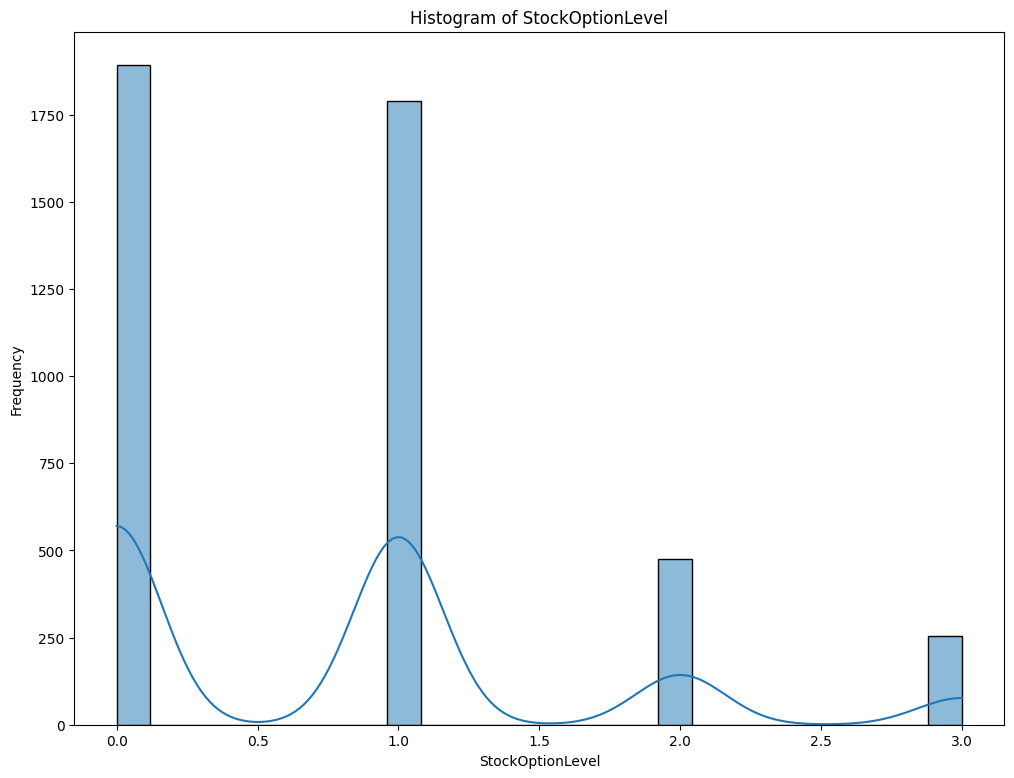

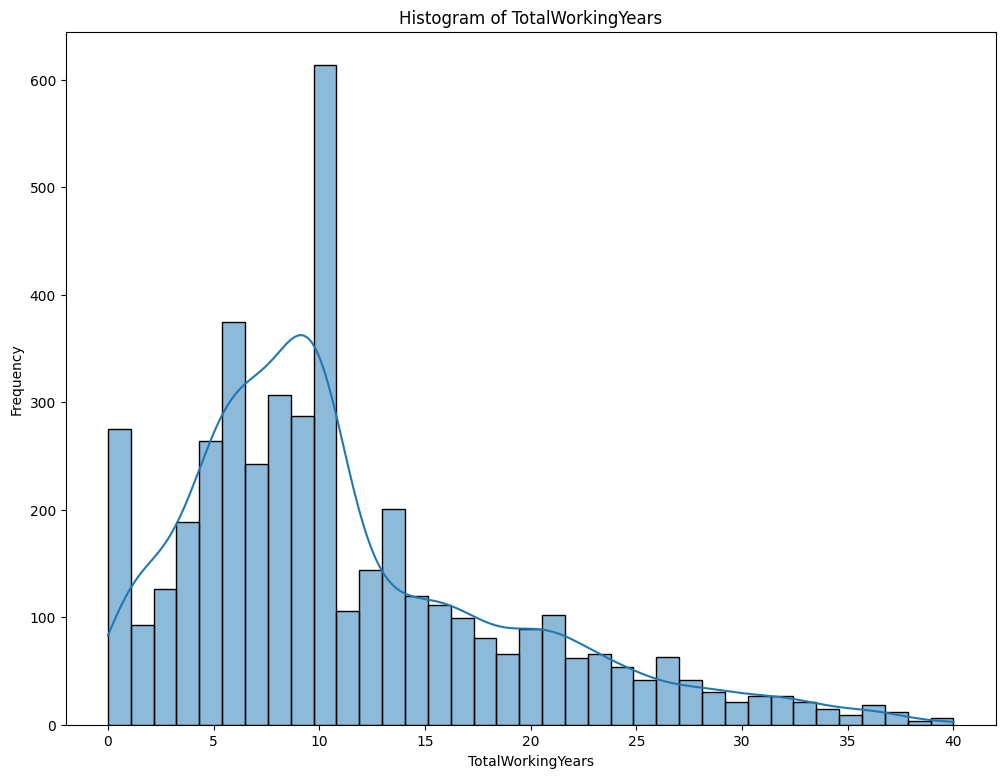

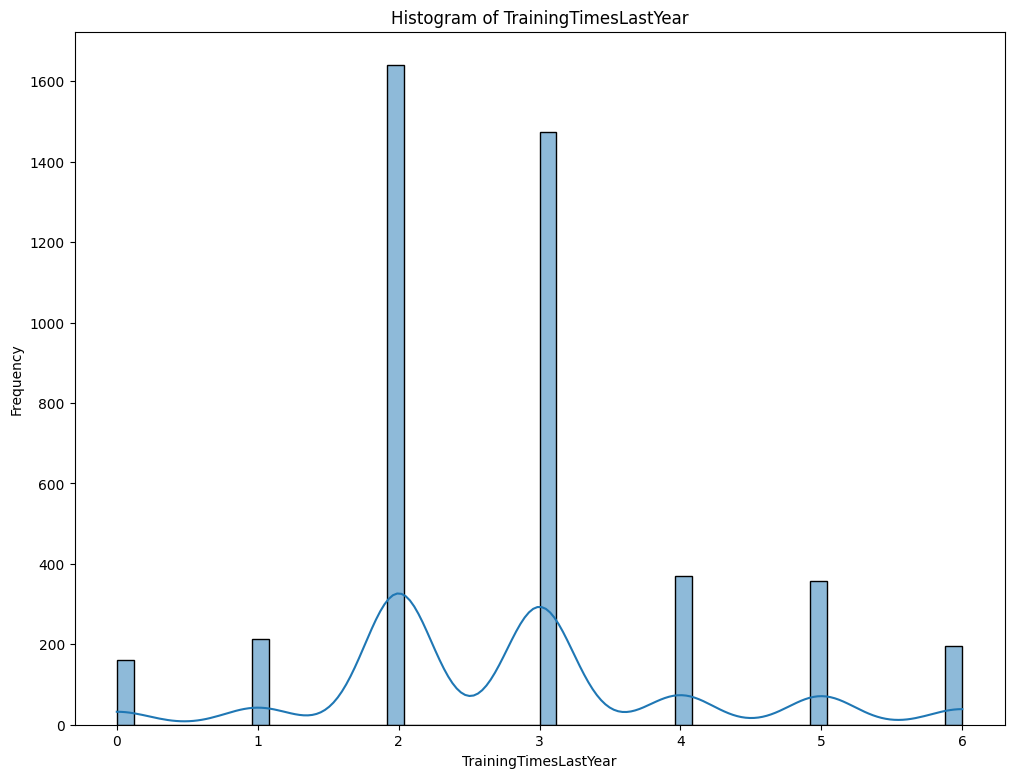

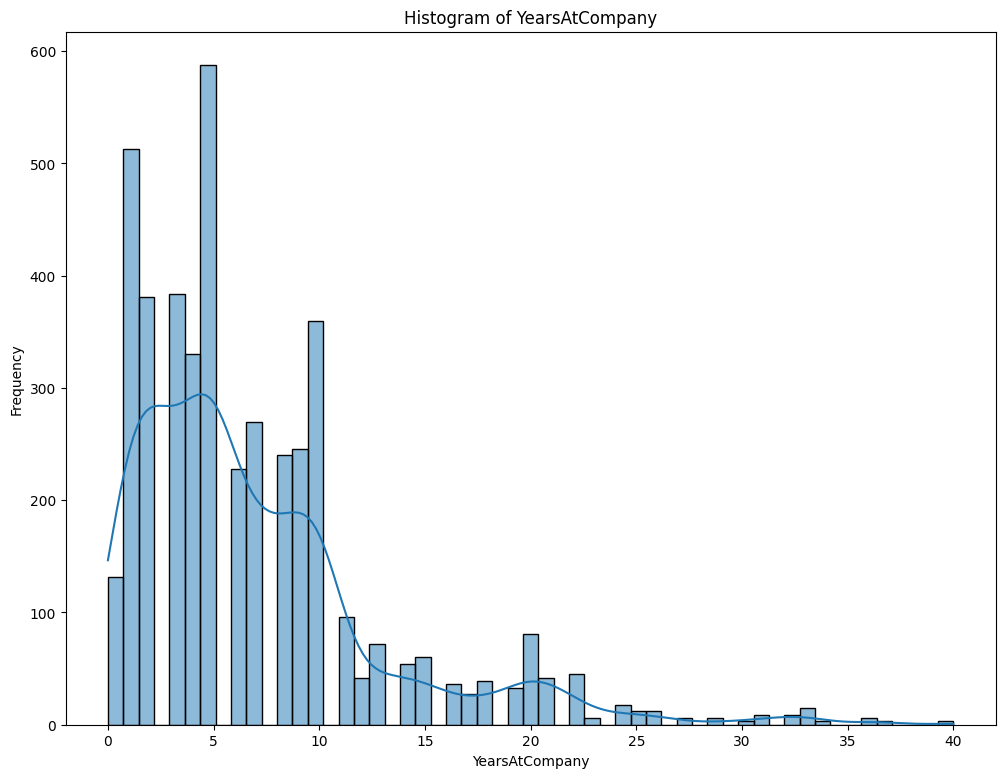

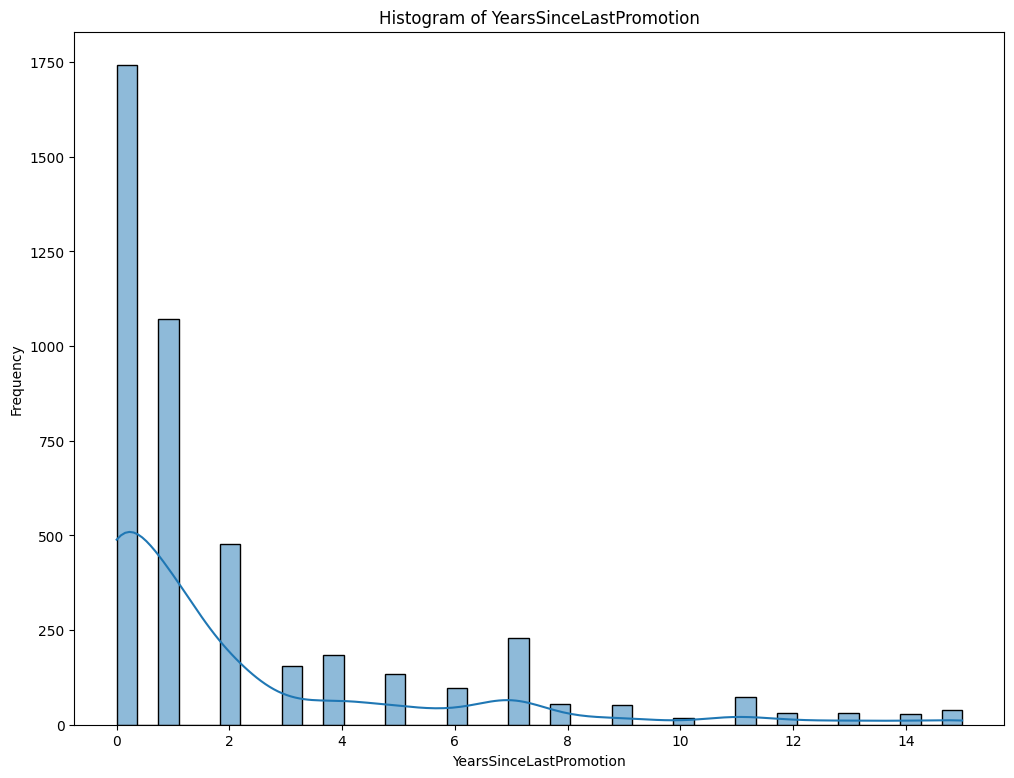

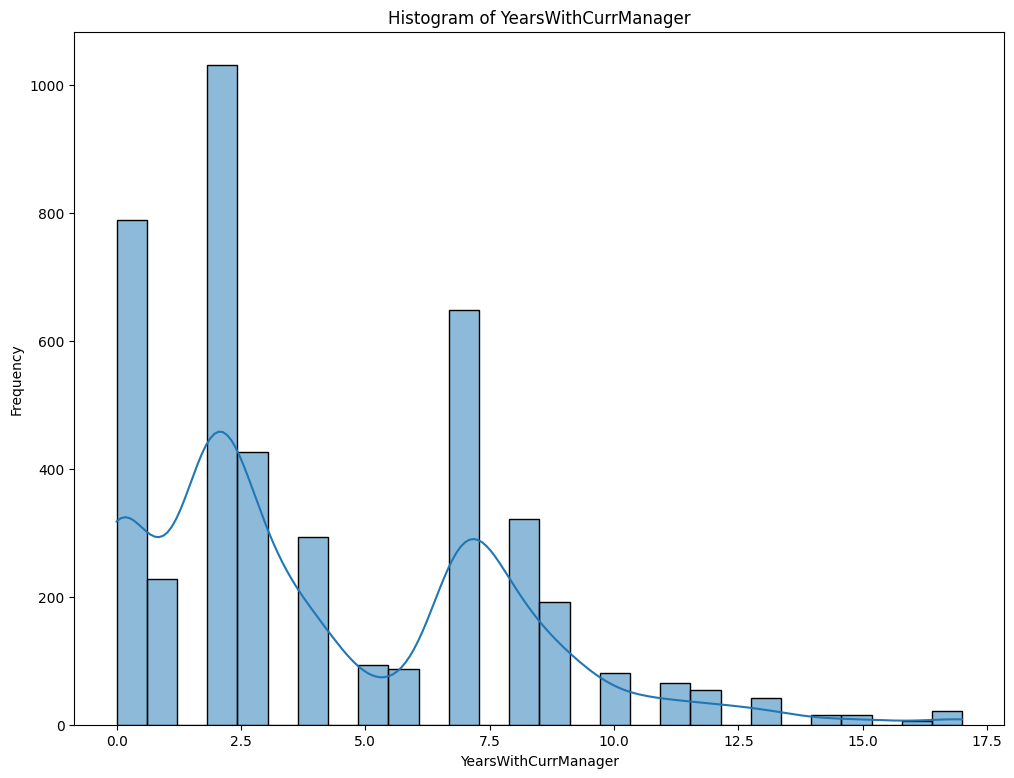

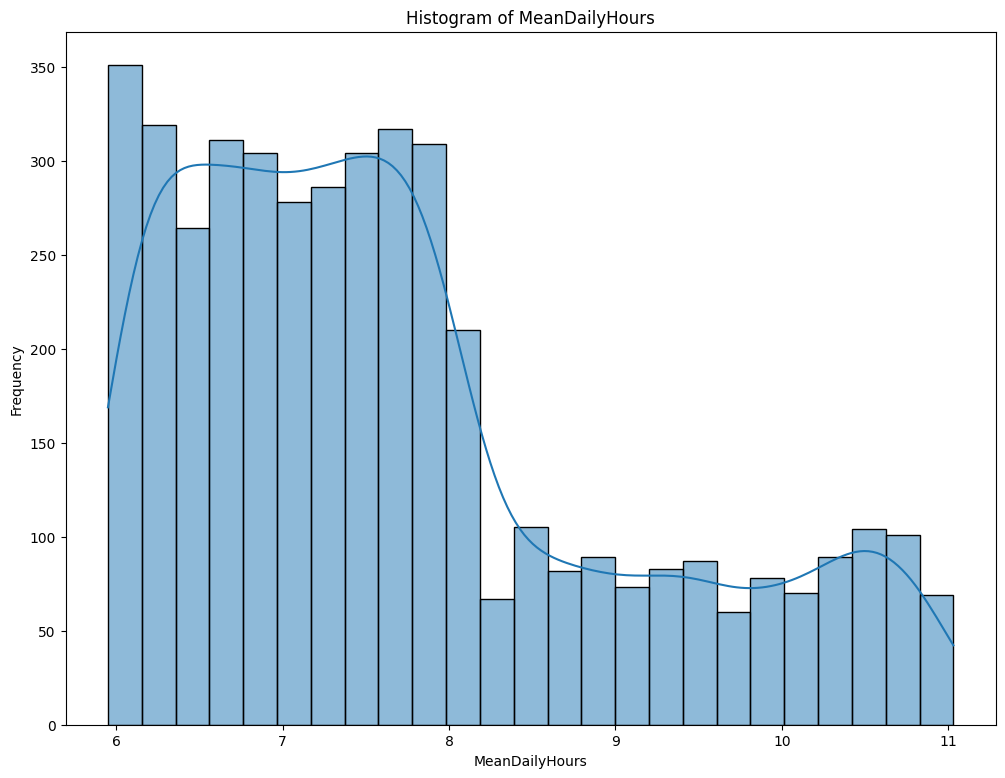

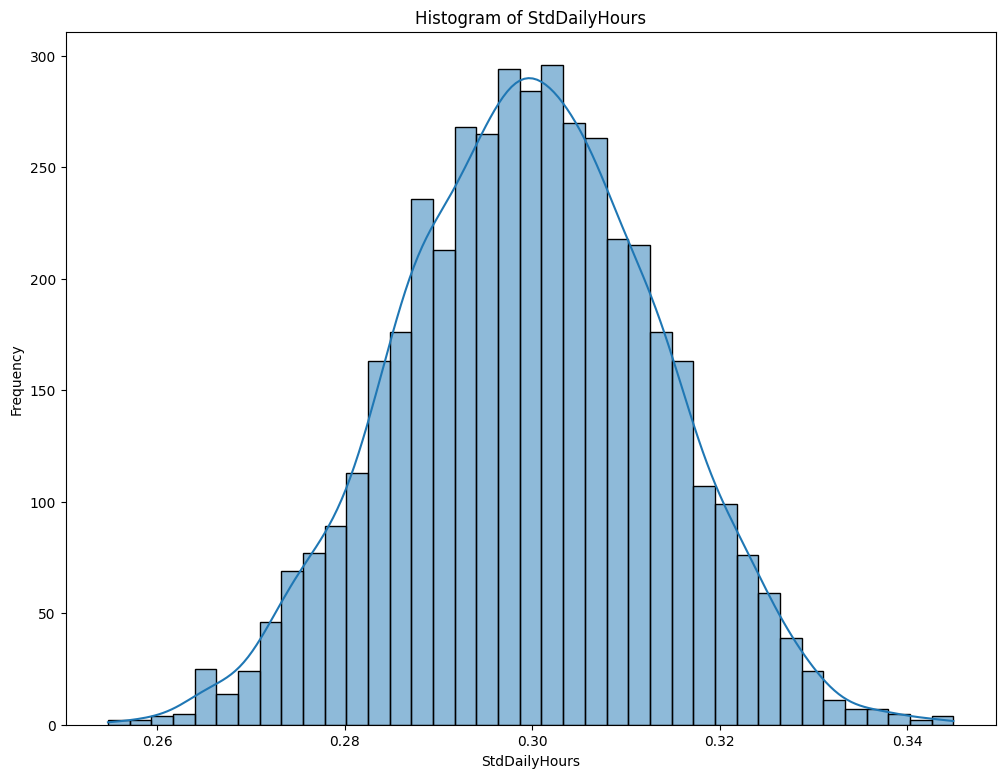

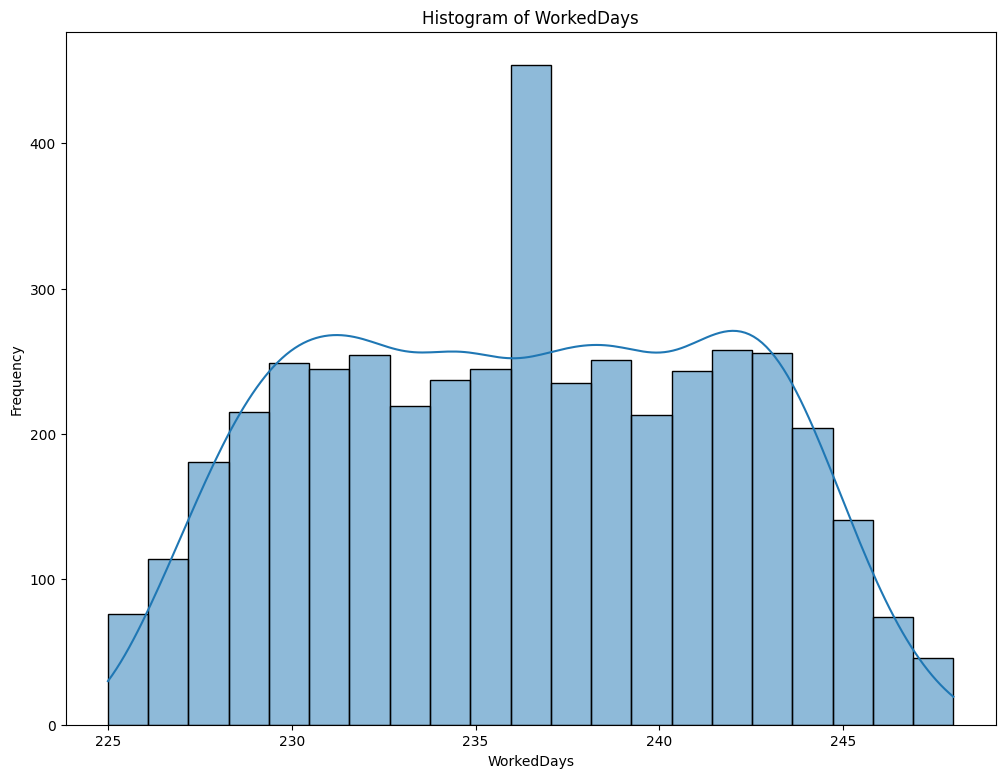

In [26]:
import seaborn as sns
# ------- Analyse univarié des valeurs numériques
for column in num_cols:
    # Taille de la figure
    plt.figure(figsize=(12, 9))
    if column != "EmployeeID":
        # Génération de l'histogramme pour chaque colonne du dataset
        sns.histplot(final_dataset[column], kde=True) #kde=True for kernel density estimation ie the curve
        # Titre de l'histogramme
        plt.title(f'Histogram of {column}')
        # Label pour l'axe des abscisses = colonne
        plt.xlabel(column)
        # Label pour l'axe des ordonnées = Fréquence
        plt.ylabel('Frequency')
        # Affichage de l'histogramme
        plt.show()

## **Interpretation des graphiques pour chaque variable numérique.**

### **DistanceFromHome**

L’histogramme de *DistanceFromHome* montre une distribution fortement asymétrique à droite. La majorité des employés résident relativement près de leur lieu de travail, avec une concentration importante entre 1 et 5 unités de distance. Cependant, on observe une longue traîne correspondant à des employés habitant beaucoup plus loin, jusqu’à environ 30 unités. Cette hétérogénéité suggère que la distance domicile–travail pourrait jouer un rôle différencié dans l’attrition, notamment en augmentant la fatigue ou l’insatisfaction pour les employés les plus éloignés. La distribution non normale justifie par ailleurs l’usage de méthodes robustes lors du prétraitement (ex. médiane, standardisation).



### **Education**

La variable *Education* présente une distribution discrète et multimodale, ce qui est attendu puisqu’il s’agit d’un niveau d’éducation codé par catégories ordinales. Les niveaux 3 et 4 sont les plus représentés, indiquant que la majorité des employés possède un niveau d’éducation intermédiaire à élevé. Les niveaux extrêmes (1 et 5) sont nettement moins fréquents. Cette répartition suggère une population relativement homogène sur le plan éducatif, tout en conservant une variabilité suffisante pour potentiellement expliquer certaines différences de trajectoire professionnelle ou d’attrition.



### **JobLevel**

L’histogramme de *JobLevel* révèle une forte concentration sur les niveaux les plus bas (1 et 2), avec une décroissance progressive à mesure que le niveau hiérarchique augmente. Les niveaux élevés (4 et 5) sont très minoritaires, ce qui reflète une structure organisationnelle pyramidale classique. Cette distribution déséquilibrée indique que la majorité des employés occupent des postes d’entrée ou intermédiaires, qui sont souvent plus exposés au turnover. *JobLevel* apparaît ainsi comme une variable potentiellement discriminante pour la prédiction de l’attrition.



### **MonthlyIncome**

La variable *MonthlyIncome* présente une distribution très asymétrique à droite, avec une forte concentration des salaires dans les tranches basses à intermédiaires, suivie d’une longue traîne correspondant à des revenus élevés. Cette structure reflète la corrélation naturelle entre le salaire, le niveau de poste et l’ancienneté. La présence de valeurs extrêmes confirme la nécessité d’une normalisation ou standardisation avant la modélisation, afin d’éviter que cette variable domine l’apprentissage des modèles. Le revenu mensuel constitue par ailleurs un facteur clé de satisfaction et peut avoir un impact direct sur l’attrition.



### **NumCompaniesWorked**

Le graphique de la variable *NumCompaniesWorked* montre le nombre de sociétés dans lesquelles les individus ont travaillé. On observe une fréquence élevée de personnes ayant travaillé pour zéro ou une seule entreprise, suivie d’une décroissance progressive des fréquences à mesure que le nombre de sociétés augmente. Cela suggère une stabilité professionnelle chez de nombreuses personnes, avec peu de mobilité inter-entreprises.



### **PercentSalaryHike**

Le graphique de la variable *PercentSalaryHike* illustre la distribution des augmentations de salaire en pourcentage. Il y a un pic autour de 12-14%, indiquant qu'une majorité des individus ont reçu une augmentation salariale modeste. La distribution décroît ensuite avec des augmentations plus élevées, ce qui pourrait signifier que des augmentations plus importantes sont rares dans cet échantillon.



### **StockOptionLevel**

Le graphique de la variable *StockOptionLevel* représente le niveau d'options sur actions. La majorité des individus ont un niveau faible d'options (0 ou 1), avec des fréquences décroissantes pour des niveaux d'options plus élevés. Cela pourrait suggérer que les options sur actions ne sont pas courantes dans cet échantillon, et que les employés sont principalement dans des structures de rémunération plus classiques.



### **TotalWorkingYears** 

La distribution des années totales d'expérience professionnelle présente un pic majeur autour de 10 ans (environ 615 employés), suggérant une concentration importante de professionnels en milieu de carrière. La courbe de densité révèle une distribution asymétrique avec une longue traîne droite, indiquant la présence d'employés expérimentés (jusqu'à 40 ans d'expérience) mais en proportions décroissantes. Cette répartition suggère une organisation mature avec un équilibre entre personnel junior et senior.



### **TrainingTimesLastYear**

Le nombre de formations suivies l'année précédente montre deux pics dominants à 2 et 3 formations par employé (environ 1650 et 1500 occurrences respectivement), reflétant une politique de développement professionnel structurée. La distribution multimodale avec des pics additionnels à 4, 5 et 6 formations suggère l'existence de parcours de formation différenciés selon les profils ou départements. Cette variabilité témoigne d'un investissement significatif mais hétérogène dans le capital humain.



### **YearsAtCompany**

L'ancienneté dans l'entreprise présente une distribution fortement asymétrique avec un maximum autour de 5 ans (près de 600 employés). La décroissance rapide après ce pic, combinée à une concentration importante dans les 10 premières années, suggère soit un turnover relativement élevé, soit une croissance récente de l'organisation. La présence marginale d'employés avec plus de 30 ans d'ancienneté indique une faible rétention à très long terme.



### **YearsSinceLastPromotion**

La distribution révèle une concentration massive à 0 année depuis la dernière promotion (environ 1750 employés), indiquant soit des promotions récentes généralisées, soit l'inclusion de nouvelles recrues. La décroissance exponentielle ensuite suggère que les promotions deviennent progressivement moins fréquentes avec le temps. Les pics secondaires autour de 7 ans pourraient refléter des cycles promotionnels ou des paliers de carrière spécifiques.



### **YearsWithCurrManager**

Le temps passé avec le manager actuel montre un pic important entre 2 et 3 ans (environ 1030 employés), suggérant une rotation managériale modérée ou des restructurations périodiques. La présence d'un second pic notable autour de 7 ans indique toutefois l'existence de relations manager-employé stables dans certains cas. Cette distribution bimodale pourrait refléter différentes cultures managériales ou des mobilités internes variables selon les départements.



### **MeanDailyHours**

La distribution des heures quotidiennes moyennes présente une forme bimodale avec un premier pic autour de 6 heures et un plateau entre 7 et 8 heures, suggérant deux populations distinctes : employés à temps partiel ou horaires réduits, et employés à temps plein. La queue de distribution s'étendant jusqu'à 11 heures indique la présence d'employés en surcharge de travail potentielle, soulevant des questions d'équilibre vie professionnelle-personnelle et de risques psychosociaux.



### **StdDailyHours**

L'écart-type des heures quotidiennes suit une distribution quasi-normale centrée autour de 0,30, avec une légère asymétrie droite. Cette concentration indique une variabilité relativement homogène des horaires de travail au sein de la population, suggérant des rythmes de travail relativement réguliers. Les valeurs faibles (0,26-0,34) témoignent d'une stabilité quotidienne des horaires pour la majorité des employés, caractéristique d'environnements de travail structurés.



### **WorkedDays**

Le nombre de jours travaillés présente un pic extrêmement prononcé autour de 237 jours (environ 455 employés), correspondant approximativement à une année de travail standard (environ 48 semaines). La distribution relativement symétrique autour de cette valeur centrale, avec des queues s'étendant de 225 à 247 jours, reflète les variations liées aux congés individuels, absences et spécificités contractuelles, témoignant d'une assiduité globalement stable et conforme aux normes du marché du travail.



## **Analyse univariée des variables catégorielles**

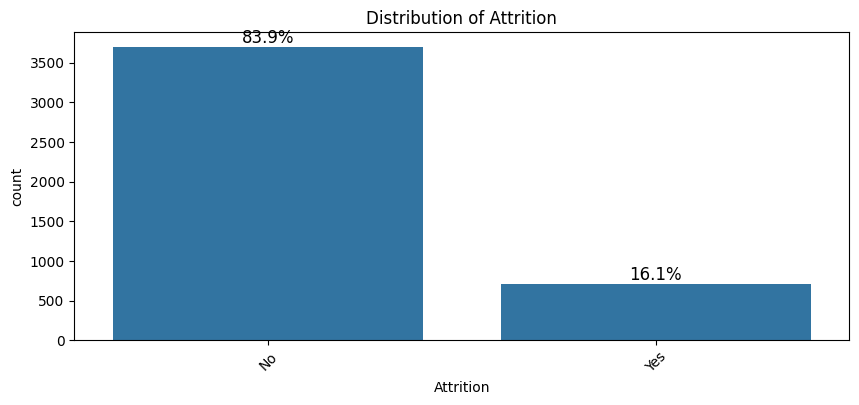

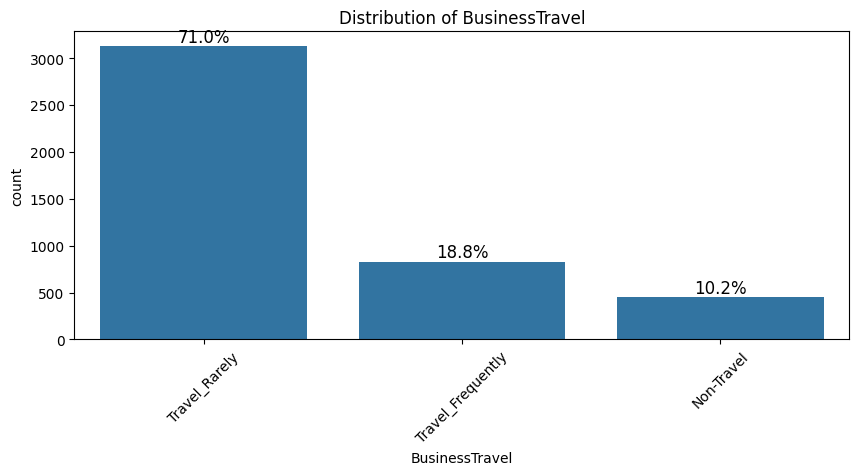

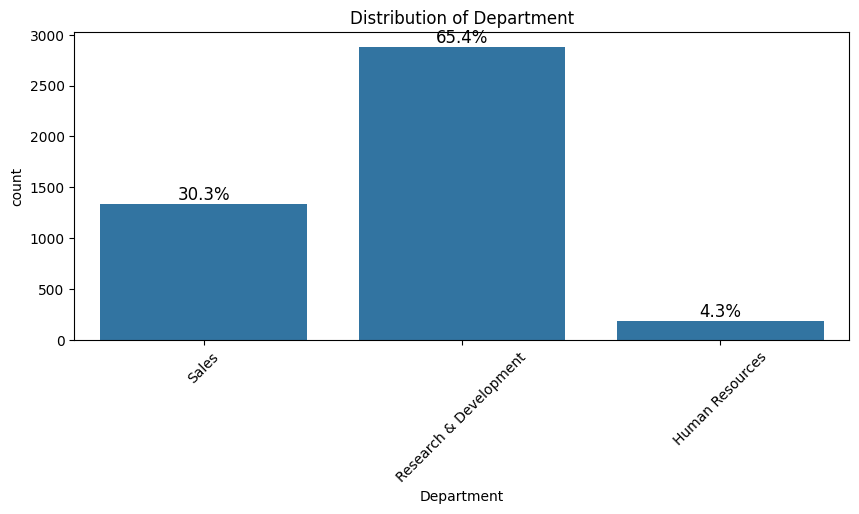

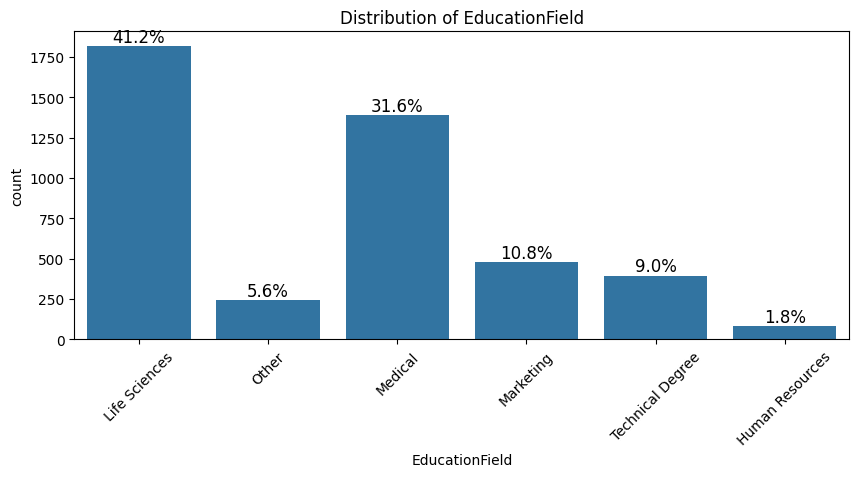

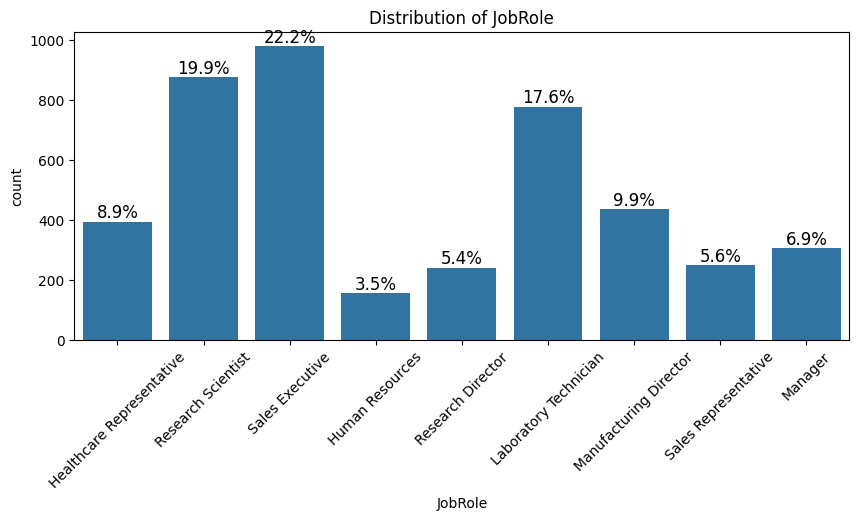

In [27]:
# ------- Analyse univarié des valeurs catégoriques
for column in cat_cols:
    # Taille de la figure
    plt.figure(figsize=(10, 4))
    # Génération du diagramme de comptage avec les colonnes du dataset en abscisse
    ax = sns.countplot(x=final_dataset[column])
    # Titre du diagramme en fonction de la colonne étudiée
    plt.title(f'Distribution of {column}')
    # Rotation des graduations de l'axe des abcsisse de 45° pour une meilleur lisibilité.
    plt.xticks(rotation=45)
    # Affichage du diagramme de comptage.
    total = len(final_dataset)
    for p in ax.patches:
        count = p.get_height()
        percentage = 100 * count / total
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2, count), 
                    ha='center', va='bottom', fontsize=12)
    plt.show()

## **Interpretation des graphiques pour les variables catégorielles**

### **Attrition**

La distribution de l'attrition révèle un déséquilibre marqué avec 83,9% d'employés restant dans l'organisation contre seulement 16,1% de départs. Ce taux d'attrition de 16,1% peut être considéré comme modéré à élevé selon les standards sectoriels, signalant des enjeux potentiels en matière de rétention des talents. Cette proportion substantielle de départs constitue la variable cible critique pour toute analyse prédictive visant à identifier les facteurs de risque et développer des stratégies de fidélisation proactives.

### **BusinessTravel**

La fréquence des déplacements professionnels montre une prédominance claire des employés voyageant rarement (71,0%), suivis de ceux voyageant fréquemment (18,8%) et de non-voyageurs (10,2%). Cette distribution suggère une culture organisationnelle favorisant le télétravail ou les opérations locales pour la majorité du personnel. L'analyse de la corrélation entre intensité des déplacements et attrition serait pertinente, les déplacements fréquents constituant souvent un facteur de stress et d'insatisfaction professionnelle.

### **Department**

La répartition départementale présente une concentration massive en Recherche & Développement (65,4%), suivie des Ventes (30,3%) et marginalement des Ressources Humaines (4,3%). Cette structure organisationnelle témoigne d'une entreprise technologique ou à forte intensité de R&D, où l'innovation constitue le cœur de l'activité. Le sous-effectif relatif des RH pourrait soulever des questions quant à la capacité de gestion du capital humain, particulièrement dans un contexte d'attrition significative.

### **EducationField**

Les domaines de formation révèlent une dominance des Sciences de la Vie (41,2%) et du Médical (31,6%), cumulant près de 73% des effectifs. Cette spécialisation éducative cohérente avec la prédominance du département R&D suggère une orientation secteur biotechnologie, pharmaceutique ou santé. La diversité limitée des profils académiques (Marketing 10,8%, Technical Degree 9,0%) pourrait impacter la capacité d'innovation transversale et la culture organisationnelle, potentiellement favorisant une pensée homogène.

### **JobRole**

La distribution des rôles professionnels montre une diversité significative avec trois fonctions principales : Sales Executive (22,2%), Research Scientist (19,9%) et Research Director (17,6%), représentant collectivement près de 60% des effectifs. La présence notable de rôles techniques et managériaux (Laboratory Technician 9,9%, Manager 6,9%) témoigne d'une structure hiérarchique relativement plate. Le faible effectif en Human Resources (3,5%) réitère la question de la capacité de gestion RH, tandis que la diversité des rôles suggère des problématiques d'attrition potentiellement différenciées selon les fonctions.

## **Représentation avec un pie chart de la variable cible.**

Attrition
No     3699
Yes     711
Name: count, dtype: int64


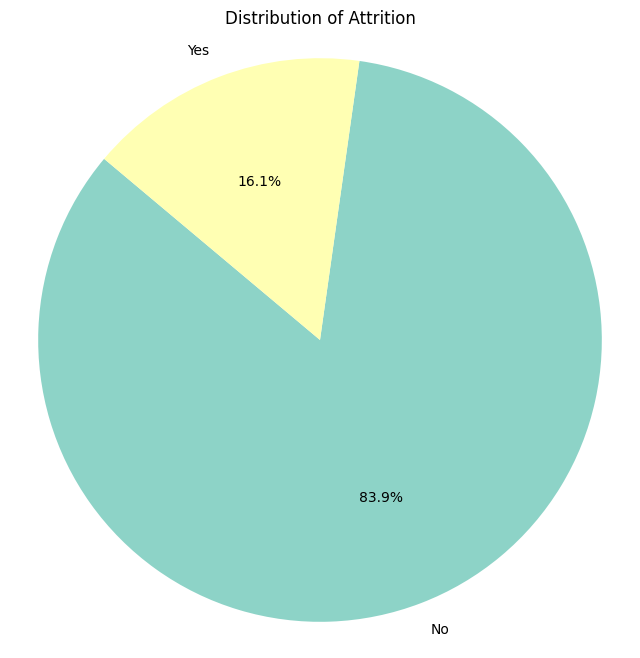

In [28]:
# reccurence de chaque valeurs possibles dans la colonne catégorique
category_counts = final_dataset["Attrition"].value_counts()
print(category_counts)
# Affichage du pie chart ou diagramme camembert
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(category_counts)))
plt.title('Distribution of Attrition')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

La représentation sous forme de diagramme camembert ou *pie chart* confirme la représentation par graphe en barre faite plus haut. La distribution de l'attrition est plutôt déséquilibrée avec 83,9% d'employés restant dans l'organisation contre seulement 16,1% qui quittent. 

## **Encodage des variables catégorielles**

Ce bloc de code applique une stratégie d’encodage différenciée et adaptée à la nature sémantique de chaque variable catégorielle, dans l’objectif de fournir aux modèles de machine learning une représentation numérique cohérente et exploitable.

In [29]:
# Target
final_dataset['Attrition'] = final_dataset['Attrition'].map({'No': 0, 'Yes': 1})

# Ordinal encoding
business_travel_order = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}
final_dataset['BusinessTravel'] = final_dataset['BusinessTravel'].map(business_travel_order)

# One-Hot Encoding
categorical_nominal = ['Department', 'EducationField', 'JobRole']
final_dataset = pd.get_dummies(final_dataset, columns=categorical_nominal, drop_first=True)

bool_cols = final_dataset.select_dtypes(include='bool').columns
final_dataset[bool_cols] = final_dataset[bool_cols].astype(int)

print(final_dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Attrition                          4410 non-null   int64  
 1   BusinessTravel                     4410 non-null   int64  
 2   DistanceFromHome                   4410 non-null   float64
 3   Education                          4410 non-null   float64
 4   EmployeeID                         4410 non-null   float64
 5   JobLevel                           4410 non-null   float64
 6   MonthlyIncome                      4410 non-null   float64
 7   NumCompaniesWorked                 4410 non-null   float64
 8   PercentSalaryHike                  4410 non-null   float64
 9   StockOptionLevel                   4410 non-null   float64
 10  TotalWorkingYears                  4410 non-null   float64
 11  TrainingTimesLastYear              4410 non-null   float

In [30]:
final_dataset.head(10)

,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0,1,6.0,2.0,1.0,1.0,131160.0,1.0,11.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,10.0,1.0,2.0,1.0,41890.0,0.0,23.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,0,2,17.0,4.0,3.0,4.0,193280.0,1.0,15.0,3.0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,2.0,5.0,4.0,3.0,83210.0,3.0,11.0,3.0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,10.0,1.0,5.0,1.0,23420.0,4.0,12.0,2.0,...,0,0,0,0,0,0,0,0,1,0
5,0,1,8.0,3.0,6.0,4.0,40710.0,3.0,13.0,0.0,...,0,0,0,0,0,0,1,0,0,0
6,1,1,11.0,2.0,7.0,2.0,58130.0,2.0,20.0,1.0,...,0,0,0,0,0,0,0,0,1,0
7,0,1,18.0,3.0,8.0,2.0,31430.0,2.0,22.0,3.0,...,0,0,0,0,0,0,0,0,1,0
8,0,1,1.0,3.0,9.0,3.0,20440.0,0.0,21.0,0.0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,7.0,4.0,10.0,4.0,134640.0,1.0,13.0,1.0,...,0,0,0,1,0,0,0,0,0,0


### **Justification des choix d’encodage des variables catégorielles**

Tout d’abord, la variable cible *Attrition* est encodée de manière binaire, avec `0` pour *No* et `1` pour *Yes*. Ce choix est naturel dans un problème de classification binaire, car il permet une interprétation directe des prédictions (probabilité de départ) et est compatible avec l’ensemble des algorithmes utilisés pour la prédiction de l’attrition.

Ensuite, la variable *BusinessTravel* est encodée de manière ordinale. Cette variable possède un ordre intrinsèque clair entre ses modalités (*Non-Travel* < *Travel_Rarely* < *Travel_Frequently*), reflétant une intensité croissante des déplacements professionnels. L’encodage ordinal permet de conserver cette information d’ordre, ce qui serait perdu avec le *One-Hot Encoding*. Cette représentation est particulièrement pertinente pour les modèles linéaires ou basés sur la distance, qui peuvent ainsi capter une relation monotone potentielle entre la fréquence des déplacements et le risque d’attrition.

Les variables *Department*, *EducationField* et *JobRole* sont quant à elles des variables catégorielles nominales, c’est-à-dire sans ordre naturel entre leurs modalités. Un encodage ordinal serait donc arbitraire et pourrait introduire des relations artificielles. Le recours au *One-Hot Encoding* via `pd.get_dummies` permet de représenter chaque catégorie par une variable binaire indépendante, garantissant qu’aucune hiérarchie implicite n’est introduite. L’option `drop_first=True` est utilisée afin d’éviter la multicolinéarité parfaite (dummy variable trap), ce qui est particulièrement important pour les modèles linéaires.

Enfin, les variables booléennes sont converties en entiers (`0` et `1`) afin d’assurer une homogénéité du format numérique du dataset final. Cette conversion est indispensable pour garantir la compatibilité avec les algorithmes de machine learning et les étapes ultérieures de standardisation ou de modélisation.

Dans l’ensemble, cette stratégie d’encodage repose sur une distinction claire entre variables binaires, ordinales et nominales, assurant une transformation fidèle de l’information initiale tout en respectant les contraintes méthodologiques du machine learning. Elle contribue ainsi à améliorer la performance, la stabilité et l’interprétabilité des modèles, qui ont pour objectif principal la prédiction de l'attrition.
